## 1. Import libraries
- pandas
- numpy
- pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Read data from csv
- path to csv file = 'owid-covid-data.csv'

In [2]:
data_path = 'owid-covid-data.csv'
df = pd.read_csv(data_path)

## 3. Prepare data
### 3.1. Describe data from the original dataframe

In [3]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.954900e+04,89548.000000,88536.000000,7.964200e+04,79800.000000,88536.000000,89070.000000,89069.000000,88062.000000,79176.000000,...,83119.000000,56228.000000,83306.000000,85212.000000,65215.000000,64258.000000,41858.000000,75955.000000,87671.000000,83486.000000
mean,9.389156e+05,6060.785400,6075.183356,2.528245e+04,142.217256,127.084010,11521.388928,76.036400,76.249857,251.195053,...,19292.745002,13.381098,258.130925,7.883554,10.540529,32.673493,50.873450,3.028744,73.230858,0.727715
std,6.480837e+06,38287.309112,37867.395017,1.507138e+05,781.312585,721.056227,21704.895372,200.442461,157.903455,438.470398,...,19960.871370,19.954350,118.890810,4.073332,10.428990,13.477008,31.761329,2.461009,7.562973,0.150398
min,1.000000e+00,-348667.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-5160.525000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.086000e+03,2.000000,7.143000,4.900000e+01,0.000000,0.000000,225.762750,0.207000,1.229000,7.451250,...,4466.507000,0.600000,167.295000,5.310000,1.900000,21.600000,20.859000,1.300000,67.920000,0.602000
50%,1.193200e+04,71.000000,88.429000,3.380000e+02,2.000000,1.286000,1547.514500,7.958000,10.523500,45.371500,...,12951.839000,2.200000,242.648000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.748000
75%,1.266060e+05,787.000000,826.321750,3.300000e+03,18.000000,14.143000,11500.233500,70.558000,79.231000,276.102250,...,27216.445000,21.200000,329.635000,10.080000,19.300000,41.100000,83.241000,3.861000,78.740000,0.848000
max,1.703485e+08,905992.000000,826374.286000,3.541324e+06,17906.000000,14436.286000,177221.252000,18293.675000,4083.500000,3077.321000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000


- Show columns of the dataframe

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

### 3.2. Take useful features for our model
- location (to get the country name)
- date
- total_cases
- new_cases
- total_deaths
- new_deaths

In [5]:
features = ['location','date','total_cases','new_cases','total_deaths','new_deaths']

In [6]:
df2 = df[features]
df2

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...
92327,Zimbabwe,2021-05-26,38819.0,113.0,1589.0,2.0
92328,Zimbabwe,2021-05-27,38854.0,35.0,1592.0,3.0
92329,Zimbabwe,2021-05-28,38918.0,64.0,1592.0,0.0
92330,Zimbabwe,2021-05-29,38933.0,15.0,1594.0,2.0


### 3.3. Fix NaN cells

In [7]:
df3 = df2.copy()
for columns in df3.columns:
    df3[columns].fillna(0,inplace=True)

In [8]:
df3

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0
1,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
92327,Zimbabwe,2021-05-26,38819.0,113.0,1589.0,2.0
92328,Zimbabwe,2021-05-27,38854.0,35.0,1592.0,3.0
92329,Zimbabwe,2021-05-28,38918.0,64.0,1592.0,0.0
92330,Zimbabwe,2021-05-29,38933.0,15.0,1594.0,2.0


In [9]:
vnm_data = df3[df3['location']=='Vietnam']
vnm_data

,location,date,total_cases,new_cases,total_deaths,new_deaths
89987,Vietnam,2020-01-23,2.0,2.0,0.0,0.0
89988,Vietnam,2020-01-24,2.0,0.0,0.0,0.0
89989,Vietnam,2020-01-25,2.0,0.0,0.0,0.0
89990,Vietnam,2020-01-26,2.0,0.0,0.0,0.0
89991,Vietnam,2020-01-27,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...
90476,Vietnam,2021-05-26,6086.0,155.0,45.0,1.0
90477,Vietnam,2021-05-27,6356.0,270.0,46.0,1.0
90478,Vietnam,2021-05-28,6396.0,40.0,47.0,1.0
90479,Vietnam,2021-05-29,6908.0,512.0,47.0,0.0


In [10]:
vnm_data2 = vnm_data.copy()

In [11]:
vnm_data2['year-month'] = vnm_data2['date'].apply(lambda x: str(x[:4]) + '-' + str(x[5:7]))

In [12]:
vnm_data2

,location,date,total_cases,new_cases,total_deaths,new_deaths,year-month
89987,Vietnam,2020-01-23,2.0,2.0,0.0,0.0,2020-01
89988,Vietnam,2020-01-24,2.0,0.0,0.0,0.0,2020-01
89989,Vietnam,2020-01-25,2.0,0.0,0.0,0.0,2020-01
89990,Vietnam,2020-01-26,2.0,0.0,0.0,0.0,2020-01
89991,Vietnam,2020-01-27,2.0,0.0,0.0,0.0,2020-01
...,...,...,...,...,...,...,...
90476,Vietnam,2021-05-26,6086.0,155.0,45.0,1.0,2021-05
90477,Vietnam,2021-05-27,6356.0,270.0,46.0,1.0,2021-05
90478,Vietnam,2021-05-28,6396.0,40.0,47.0,1.0,2021-05
90479,Vietnam,2021-05-29,6908.0,512.0,47.0,0.0,2021-05


In [13]:
vnm_data3 = vnm_data2.groupby('year-month')
vnm_data3.sum()

,total_cases,new_cases,total_deaths,new_deaths
year-month,,,,
2020-01,18.0,2.0,0.0,0.0
2020-02,398.0,14.0,0.0,0.0
2020-03,2514.0,196.0,0.0,0.0
2020-04,7778.0,58.0,0.0,0.0
2020-05,9465.0,58.0,0.0,0.0
2020-06,10196.0,27.0,0.0,0.0
2020-07,12278.0,203.0,3.0,3.0
2020-08,28091.0,486.0,637.0,31.0
2020-09,31897.0,50.0,1048.0,1.0


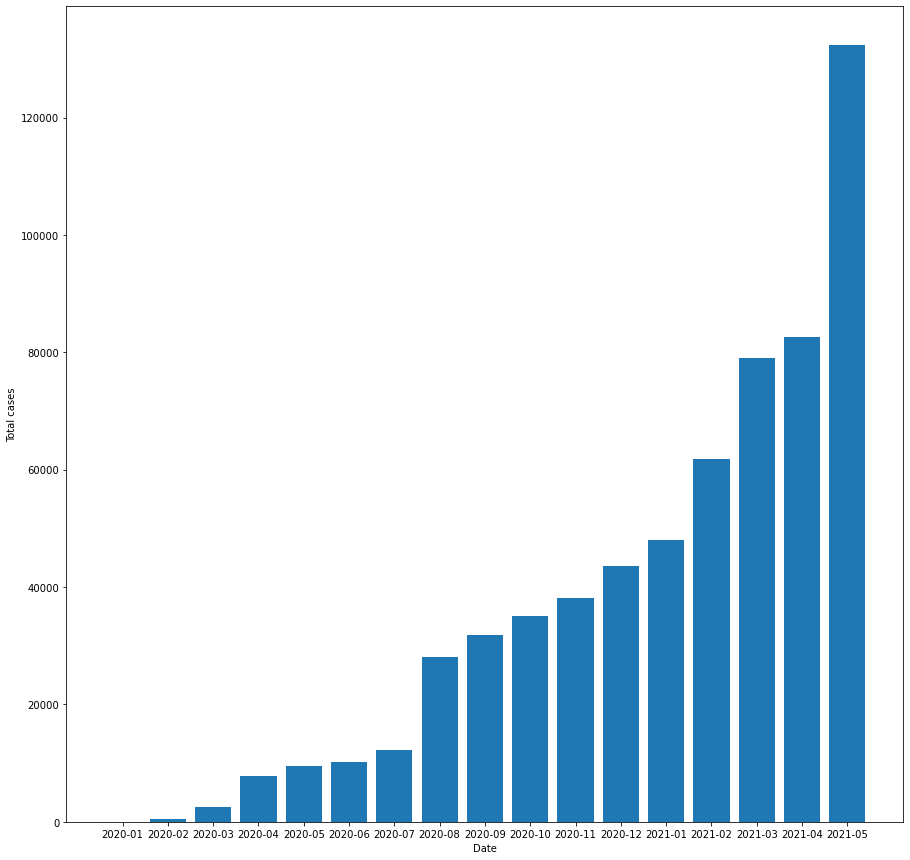

In [18]:
plt.figure(figsize=(15,15))
plt.bar(vnm_data3.sum().index,vnm_data3.sum()['total_cases'])
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.show()